In [32]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
def improt_data(lujing,code):
    data = pd.read_csv(lujing,encoding =code)
    return data

def mean(data,a):
    print(data[a].mean())
    print(data[a].std())

def box_polt(a):
    zhongwei = a.median()
    mean = a.mean()
    q1 = a.quantile(0.25)
    q2 = a.quantile(0.5)
    q3 = a.quantile(0.75)
    q4 = a.quantile(1)
    iqr = q3-q1
    upper = q3 + 1.5*iqr
    print('--------------')
    print('中位:',zhongwei)
    print('平均:',mean)    
    print('--------------')
    print('50% :',q2)
    print('75% :',q3)
    print('100%:',upper)
    print('max :',q4)
    print('--------------')
    list_ = []
    list_.append(q2)
    list_.append(q3)
    list_.append(upper)
    return list_

def data_order(a,b):
#     lujing = r'C:/Users/Administrator/Datas/爱尚花语/艾尚花语指标模型/data/Ddata.csv'
#     code = 'gbk'
    data = improt_data(lujing,code)
    if b == 0:
        df_hsh_max = data[data['下单人数'] > a]
        k = df_hsh_max
        return k
    elif a == 0:
        df_hsh_min = data[data['下单人数'] < b  ]
        k = df_hsh_min
        return k
    else:
        df_hsh_ = data[(data['下单人数'] >a) & (data['下单人数'] < b) ]
        k = df_hsh_
        return k 
    
def linear(x,y):
    from sklearn import metrics
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn import linear_model
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)
    print('数据分集查看：')
    print ('X训练',X_train.shape)
    print ('y训练',y_train.shape)
    print ('X测试',X_test.shape)
    print ('y测试',y_test.shape)
    print('-------------')
    linear =  linear_model.LinearRegression()
    linear.fit(X_train,y_train)
    print('线性结截距:', linear.intercept_)
    print ('回归系数',linear.coef_)
    y_pred = linear.predict(X_test)
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

def line_bg_rd(x1,y1):   
    x = x1
    y = y1
    data_min = data_order(x,y)
    baoguang = data_min['下单人数'].values.reshape(-1,1)
    jindian = data_min['有效订单数'].values.reshape(-1, 1)
    linear(baoguang,jindian)

def drop(data):
    a = data
    a.drop_duplicates(subset='商家ID',inplace = True,keep = 'last')
    print(a['商家ID'].count())


def cluster_look(data):
    list_ = [1,3,0,2]
    for i in list_:
        df = data[data['cluster'] == i]
        i = str(i)
        print('cluster_' + i +'等级的门店数量:' + str(df['cluster'].count()))    


In [43]:
lujing = r'C:/Users/Administrator/Datas/爱尚花语/艾尚花语指标模型/data/Ddata.csv'
code = 'gbk'
data = improt_data(lujing,code)



In [44]:
# data.describe()

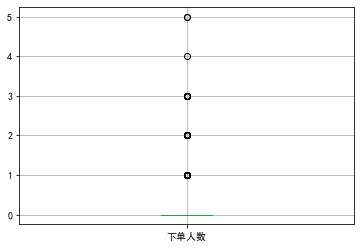

In [45]:
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False 
data.boxplot('下单人数')

In [46]:
a = data['下单人数']
list_ = box_polt(a)
q1 = list_[0]
q2 = list_[1]
q3 = list_[2]
q0 =  0
q4 = 5
print(q1)
print(q2)
print(q3)

--------------
中位: 0.0
平均: 0.1611804767309875
--------------
50% : 0.0
75% : 0.0
100%: 0.0
max : 5.0
--------------
0.0
0.0
0.0


In [47]:
line_bg_rd(q0,q1)
print(''' ''') 
line_bg_rd(q1,q2)
print(''' ''') 
line_bg_rd(q2,q3)
print(''' ''') 
q3 = 1
line_bg_rd(q3,q4)

数据分集查看：
X训练 (165, 1)
y训练 (165, 1)
X测试 (56, 1)
y测试 (56, 1)
-------------
线性结截距: [0.03448276]
回归系数 [[0.85862069]]
RMSE: 0.41703267996361565
 
数据分集查看：
X训练 (165, 1)
y训练 (165, 1)
X测试 (56, 1)
y测试 (56, 1)
-------------
线性结截距: [0.03448276]
回归系数 [[0.85862069]]
RMSE: 0.41703267996361565
 
数据分集查看：
X训练 (165, 1)
y训练 (165, 1)
X测试 (56, 1)
y测试 (56, 1)
-------------
线性结截距: [0.03448276]
回归系数 [[0.85862069]]
RMSE: 0.41703267996361565
 
数据分集查看：
X训练 (33, 1)
y训练 (33, 1)
X测试 (12, 1)
y测试 (12, 1)
-------------
线性结截距: [0.54435484]
回归系数 [[0.61693548]]
RMSE: 0.4512362220371837


In [48]:
data_max = data_order(q3,q4)
data_one = data_order(q2,q3)
data_two = data_order(q1,q2)
data_min = data_order(q0,q1)

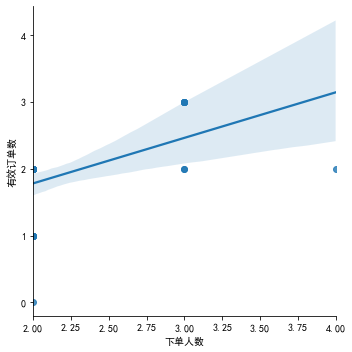

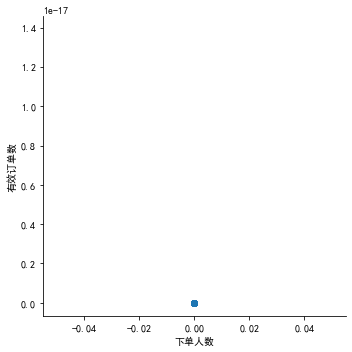

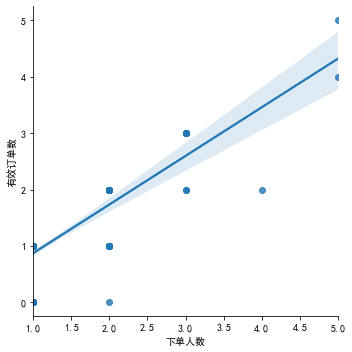

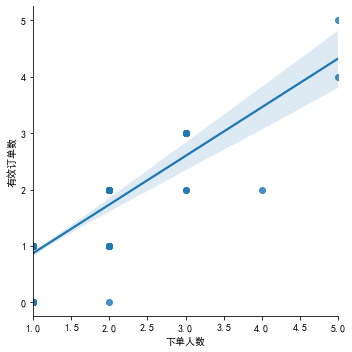

In [49]:
sns.lmplot(x="下单人数", y="有效订单数",data=data_max,fit_reg=True)
sns.lmplot(x="下单人数", y="有效订单数",data=data_one,fit_reg=True)
sns.lmplot(x="下单人数", y="有效订单数",data=data_two,fit_reg=True)
sns.lmplot(x="下单人数", y="有效订单数",data=data_min,fit_reg=True)

In [51]:
drop(data_max)
drop(data_one)
drop(data_two)
drop(data_min)

17
116
66
66


In [ ]:
-----------------------------------------------------------------------------------------------------------------------------

In [52]:
lujing = r'C:/Users/Administrator/Datas/爱尚花语/艾尚花语指标模型/data/Mdata_kmeans.csv'
code = 'gbk'
data = improt_data(lujing,code)

In [53]:
# data

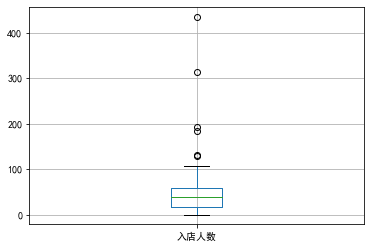

In [54]:
data.boxplot('入店人数')

In [55]:
a = data['下单人数']
list_ = box_polt(a)
q1 = list_[0]
q2 = list_[1]
q3 = list_[2]
q04 =  0
print(q1)
print(q2)
print(q3)

--------------
中位: 1.0
平均: 2.2857142857142856
--------------
50% : 1.0
75% : 2.5
100%: 6.25
max : 27.0
--------------
1.0
2.5
6.25


In [56]:
line_bg_rd(q04,q1)
print(''' ''') 
line_bg_rd(q1,q2)
print(''' ''') 
line_bg_rd(q2,q3)
print(''' ''') 
line_bg_rd(q3,q04)

数据分集查看：
X训练 (39, 1)
y训练 (39, 1)
X测试 (14, 1)
y测试 (14, 1)
-------------
线性结截距: [0.]
回归系数 [[0.]]
RMSE: 0.0
 
数据分集查看：
X训练 (12, 1)
y训练 (12, 1)
X测试 (5, 1)
y测试 (5, 1)
-------------
线性结截距: [1.75]
回归系数 [[0.]]
RMSE: 0.6800735254367721
 
数据分集查看：
X训练 (13, 1)
y训练 (13, 1)
X测试 (5, 1)
y测试 (5, 1)
-------------
线性结截距: [-1.05970149]
回归系数 [[1.17910448]]
RMSE: 0.7920298006818869
 
数据分集查看：
X训练 (9, 1)
y训练 (9, 1)
X测试 (3, 1)
y测试 (3, 1)
-------------
线性结截距: [-0.20537125]
回归系数 [[0.97235387]]
RMSE: 3.1076984180674896


In [57]:
data_max = data_order(q3,q04)
data_one = data_order(q2,q3)
data_two = data_order(q1,q2)
data_min = data_order(q04,q1)


In [58]:
drop(data_max)
drop(data_one)
drop(data_two)
drop(data_min)

12
18
17
53


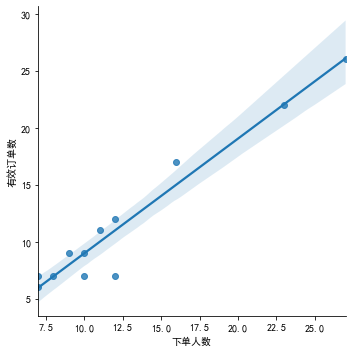

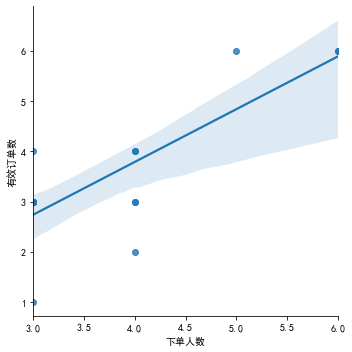

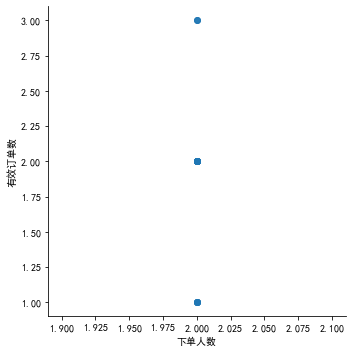

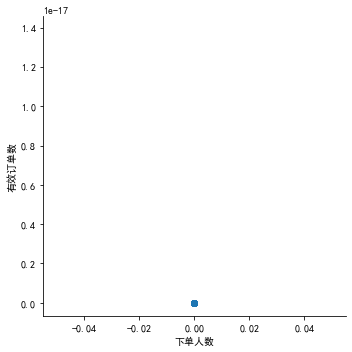

In [59]:
sns.lmplot(x="下单人数", y="有效订单数",data=data_max,fit_reg=True)
sns.lmplot(x="下单人数", y="有效订单数",data=data_one,fit_reg=True)
sns.lmplot(x="下单人数", y="有效订单数",data=data_two,fit_reg=True)
sns.lmplot(x="下单人数", y="有效订单数",data=data_min,fit_reg=True)

In [60]:
# data_max.count()
# print(data_min.count())
data_max

,Unnamed: 0,0,结束日期,商家ID,商家名称,运营组,省份,城市,是否新增商家,首次上线日期,门店在线状态,（日均）预设营业时长（h）,（日均）在线营业时长（h）,曝光人数,入店人数,下单人数,有效订单数,下单新客人数,复购人数,入店转化率,下单转化率,新客转化率,有效率,复购率,原价交易额,实付交易额,商家补贴金额,原价客单价,实付客单价,cluster
0,1,20200601,20200630,9024278,友新意鲜花坊,鲜花组,陕西省,西安,否,20200508,在线,18,18.0,18362,314,23,22,21,2,1.71,0.07,0.913043,0.956522,0.086957,4962,2596,2431,215.739130,112.869565,1
1,7,20200601,20200630,9043317,花坞,鲜花组,福建省,福州,否,20200508,在线,18,18.0,11259,435,8,7,7,1,3.86,0.02,0.875000,0.875000,0.125000,2702,1443,1279,337.750000,180.375000,1
3,60,20200601,20200630,9323842,花无缺鲜花店,鲜花组,内蒙古自治区,锡林郭勒盟,否,20200617,在线,12,11.6,4806,129,10,7,7,3,2.68,0.08,0.700000,0.700000,0.300000,1553,671,902,155.300000,67.100000,3
5,10,20200601,20200630,9043994,八度花艺,鲜花组,河南省,许昌,否,20200508,在线,15,15.5,4116,193,12,7,7,5,4.69,0.06,0.583333,0.583333,0.416667,1763,986,777,146.916667,82.166667,3
6,45,20200601,20200630,9295286,婉苑鲜花婚庆,鲜花组,黑龙江省,齐齐哈尔,否,20200611,在线,17,17.1,3895,130,16,17,16,0,3.34,0.12,1.000000,1.062500,0.000000,3993,1602,3554,249.562500,100.125000,3
10,72,20200601,20200630,9349868,花世界迷尔鲜花店,鲜花组,吉林省,长春,否,20200617,在线,22,22.6,3651,83,9,9,9,0,2.27,0.11,1.000000,1.000000,0.000000,1781,593,1228,197.888889,65.888889,3
17,29,20200601,20200630,9266337,群芳鲜花礼品,鲜花组,江苏省,泰州,否,20200606,在线,14,14.8,2562,69,10,9,9,1,2.69,0.14,0.900000,0.900000,0.100000,2101,710,1421,210.100000,71.000000,0
19,20,20200601,20200630,9223872,天天花坊,鲜花组,湖南省,郴州,否,20200602,在线,13,13.8,2527,184,27,26,26,1,7.28,0.15,0.962963,0.962963,0.037037,6025,2308,3827,223.148148,85.481481,0
38,47,20200601,20200630,9295388,田美花艺,鲜花组,辽宁省,丹东,否,20200611,在线,10,10.9,1882,71,7,7,7,0,3.77,0.10,1.000000,1.000000,0.000000,1503,547,986,214.714286,78.142857,0
41,74,20200601,20200630,9352076,花仙子（花店）,鲜花组,陕西省,西安,否,20200618,在线,14,14.4,1820,33,7,6,6,1,1.81,0.21,0.857143,0.857143,0.142857,1394,533,891,199.142857,76.142857,0


In [61]:
cluster_look(data_max)
print('-------------')
cluster_look(data_one)
print('-------------')
cluster_look(data_two)
print('-------------')
cluster_look(data_min)

cluster_1等级的门店数量:2
cluster_3等级的门店数量:4
cluster_0等级的门店数量:5
cluster_2等级的门店数量:1
-------------
cluster_1等级的门店数量:0
cluster_3等级的门店数量:0
cluster_0等级的门店数量:15
cluster_2等级的门店数量:3
-------------
cluster_1等级的门店数量:0
cluster_3等级的门店数量:5
cluster_0等级的门店数量:9
cluster_2等级的门店数量:3
-------------
cluster_1等级的门店数量:0
cluster_3等级的门店数量:3
cluster_0等级的门店数量:23
cluster_2等级的门店数量:27


In [62]:
mean(data_max,'有效率')
print('-------------------')
mean(data_one,'有效率')
print('--------------------')
mean(data_two,'有效率')
print('--------------------')
mean(data_min,'有效率')

0.908121741
0.13997183231632448
-------------------
0.9370370370000001
0.22998689617434717
--------------------
0.9117647058823529
0.3179668869182302
--------------------
0.0
0.0


In [68]:
data

,Unnamed: 0,0,结束日期,商家ID,商家名称,运营组,省份,城市,是否新增商家,首次上线日期,门店在线状态,（日均）预设营业时长（h）,（日均）在线营业时长（h）,曝光人数,入店人数,下单人数,有效订单数,下单新客人数,复购人数,入店转化率,下单转化率,新客转化率,有效率,复购率,原价交易额,实付交易额,商家补贴金额,原价客单价,实付客单价,cluster
0,1,20200601,20200630,9024278,友新意鲜花坊,鲜花组,陕西省,西安,否,20200508,在线,18,18.0,18362,314,23,22,21,2,1.71,0.07,0.913043,0.956522,0.086957,4962,2596,2431,215.73913,112.869565,1
1,7,20200601,20200630,9043317,花坞,鲜花组,福建省,福州,否,20200508,在线,18,18.0,11259,435,8,7,7,1,3.86,0.02,0.875000,0.875000,0.125000,2702,1443,1279,337.75000,180.375000,1
2,3,20200601,20200630,9043308,时初花艺,鲜花组,陕西省,咸阳,否,20200508,在线,18,18.0,4894,66,1,0,0,1,1.35,0.02,0.000000,0.000000,1.000000,0,0,0,0.00000,0.000000,3
3,60,20200601,20200630,9323842,花无缺鲜花店,鲜花组,内蒙古自治区,锡林郭勒盟,否,20200617,在线,12,11.6,4806,129,10,7,7,3,2.68,0.08,0.700000,0.700000,0.300000,1553,671,902,155.30000,67.100000,3
4,62,20200601,20200630,9338708,恒海鲜花,鲜花组,山东省,滨州,否,20200617,在线,12,12.8,4146,83,2,1,1,1,2.00,0.02,0.500000,0.500000,0.500000,129,66,68,64.50000,33.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,102,20200601,20200630,9415494,九月花艺,鲜花组,山东省,青岛,是,20200630,在线,7,7.0,30,2,1,1,1,0,6.67,0.50,1.000000,1.000000,0.000000,230,69,166,230.00000,69.000000,2
115,118,20200601,20200630,9427935,花满庭花艺,鲜花组,福建省,莆田,是,20200630,在线,0,0.0,27,1,0,0,0,0,3.70,0.00,0.000000,0.000000,0.000000,0,0,0,0.00000,0.000000,2
116,32,20200601,20200630,9268590,甜蜜花坊,鲜花组,山西省,大同,否,20200618,下线,11,10.3,21,1,0,0,0,0,4.76,0.00,0.000000,0.000000,0.000000,0,0,0,0.00000,0.000000,2
117,103,20200601,20200630,9415495,芳雅花艺生活馆,鲜花组,陕西省,渭南,是,20200630,在线,2,0.0,6,0,0,0,0,0,0.00,0.00,0.000000,0.000000,0.000000,0,0,0,0.00000,0.000000,2


In [65]:
a = data['复购率'] 
box_polt(a)

--------------
中位: 0.0
平均: 0.09979146248739496
--------------
50% : 0.0
75% : 0.0
100%: 0.0
max : 1.0
--------------


[0.0, 0.0, 0.0]

In [67]:
a = data['原价营业额'] 
box_polt(a)

KeyError: '原价营业额'